In [1]:
# from matplotlib.dates import HOURS_PER_DAY
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline
# %cd ../..

In [2]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'
import numpy as np
import jax
import jax.numpy as jnp
import flax.nnx as nnx

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import pickle
import lzma

from test_vari.multi_env.build_eval_data import build_eval_data

In [3]:
HOURS_PER_YEAR = 24 * 365
num_years = 5

In [4]:
paths = {
    'rule_based': '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/for_paper_new/20250616_081345',
    # 'no_glob': '',
    # 'no_fict': '',
    'my_alg': '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/for_paper_new/20250615_185919',
}

line_styles = {
    'rule_based': 'dashed',
    # 'no_glob': 'dashed',
    # 'no_glob': 'solid',
    'my_alg': 'solid',
    # 'no_fict': 'solid',
}

alg_names = {
    'rule_based': 'Rule based',
    # 'no_glob': 'No REC',
    # 'my_alg': 'Algorithm 1',
    'my_alg': 'Alg. 1 \u2013 deter. nodes',
    # 'no_fict': 'Alg. 1 \u2013 stoch. nodes',
}

best_iter = {'rule_based': 7,
             'my_alg': 10}

with lzma.open(next(iter(paths.values())) + '/config.xz', 'rb') as file:
    config = pickle.load(file)

plt.style.use('seaborn-v0_8-darkgrid')
# plt.style.use('seaborn-v0_8-notebook')
print(plt.rcParams)
plt.rcParams.update({'font.size': 14})


cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 0.9, n_agents))

legend_elements = [Patch(facecolor=colors[i], edgecolor=colors[i], label=f'Agent {i+1}') for i in range(n_agents)]

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: white
axes.facecolor: #EAEAF2
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.0
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.

In [5]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: white
axes.facecolor: #EAEAF2
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.0
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.

In [7]:
infos = {}

for alg, path in paths.items():
    with lzma.open(path + '/val_info.xz', 'rb') as file:
        val_info = pickle.load(file)
    infos[alg] = val_info

In [8]:
val_info['r_tot'].shape

(22, 43800, 3)

In [9]:
to_plot = val_info['r_tot']
to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])

white


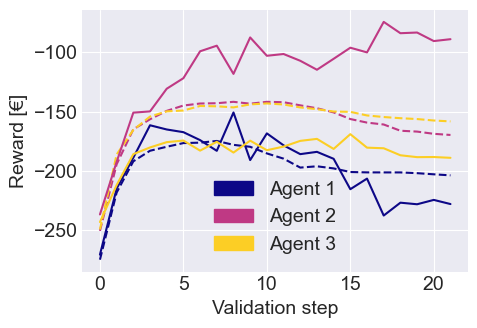

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    for i in range(n_agents):
        to_plot = val_info['r_tot'][..., i]
        to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
        to_plot = to_plot.sum(axis=-1)
        means = to_plot.mean(axis=1)
        stds = np.std(to_plot, axis=1)
        ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
        ax.plot(means, linestyle=line_styles[alg], color=colors[i], label=f'agent {i+1} {alg_names[alg]}')
        # ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)

ax.set_xlabel('Validation step')
ax.set_ylabel('Reward [€]')
print(plt.rcParams['grid.color'])  # etc.

# plt.title('Total reward')
plt.legend(handles=legend_elements)
plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/total.pdf')
plt.show()

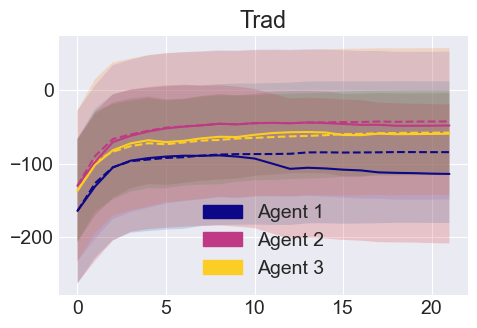

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    for i in range(n_agents):
        to_plot = val_info['weig_reward']['r_trad'][..., i]
        to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
        to_plot = to_plot.sum(axis=-1)
        means = to_plot.mean(axis=1)
        stds = np.std(to_plot, axis=1)
        ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
        ax.plot(means, linestyle=line_styles[alg], color=colors[i], label=f'{i+1} {alg}')
        ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)
plt.title('Trad')
plt.legend(handles=legend_elements)
plt.show()

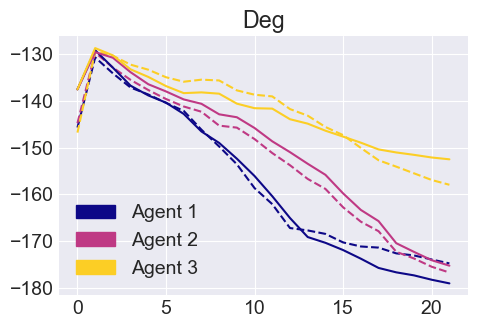

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    for i in range(n_agents):
        to_plot = val_info['weig_reward']['r_deg'][..., i]
        to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
        to_plot = to_plot.sum(axis=-1)
        means = to_plot.mean(axis=1)
        stds = np.std(to_plot, axis=1)
        ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
        ax.plot(means, linestyle=line_styles[alg], color=colors[i], label=f'{i} {alg}')
        # ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)
plt.title('Deg')
plt.legend(handles=legend_elements)
plt.show()

In [13]:
(val_info['weig_reward']['r_clipping'] < 1e-10).all()

np.True_

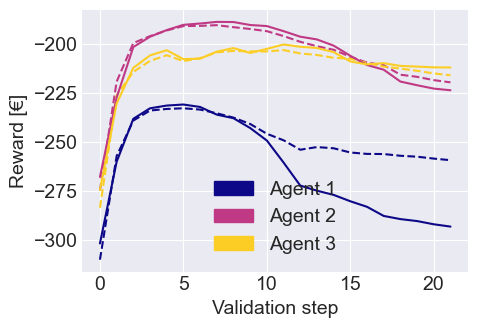

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    for i in range(n_agents):
        to_plot = val_info['weig_reward']['r_trad'][..., i] + val_info['weig_reward']['r_deg'][..., i]
        to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
        to_plot = to_plot.sum(axis=-1)
        means = to_plot.mean(axis=1)
        stds = np.std(to_plot, axis=1)
        ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
        ax.plot(means, linestyle=line_styles[alg], color=colors[i], label=f'{i} {alg}')
        # ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)
ax.set_xlabel('Validation step')
ax.set_ylabel('Reward [€]')
# plt.title('Local reward')
plt.legend(handles=legend_elements)
plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/local.pdf')
plt.show()

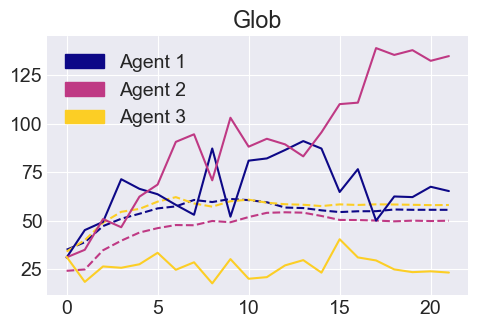

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    for i in range(n_agents):
        to_plot = val_info['weig_reward']['r_glob'][..., i]
        to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
        to_plot = to_plot.sum(axis=-1)
        means = to_plot.mean(axis=1)
        stds = np.std(to_plot, axis=1)
        ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
        ax.plot(means, linestyle=line_styles[alg], color=colors[i], label=f'{i} {alg}')
        # ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)
plt.title('Glob')


plt.legend(handles=legend_elements)
plt.show()

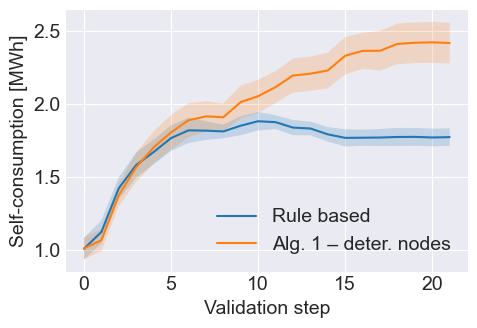

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    to_plot = val_info['self_consumption']
    to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
    to_plot = to_plot.sum(axis=-1) / 1e6
    means = to_plot.mean(axis=1)
    stds = np.std(to_plot, axis=1)
    ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
    ax.plot(means, label=alg_names[alg])
    ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)
ax.set_xlabel('Validation step')
ax.set_ylabel('Self-consumption [MWh]')
# plt.title('Self-consumption')
plt.legend()
plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/self_consumption_val.pdf')
plt.show()

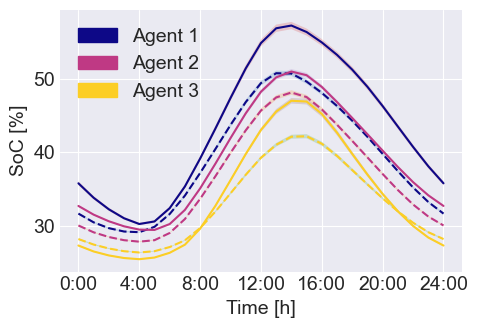

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    for i in range(n_agents):
        to_plot = val_info['soc'][best_iter[alg], ..., i] * 100
        to_plot = to_plot.reshape((-1, 24) + to_plot.shape[1:])
        to_plot = np.concatenate((to_plot, to_plot[:, 0, ...][:, np.newaxis, ...]), axis=1)
        means = to_plot.mean(axis=0)
        stds = np.std(to_plot, axis=0)
        ci = 1.96 * stds/np.sqrt(to_plot.shape[0])
        ax.plot(means, linestyle=line_styles[alg], color=colors[i], label=f'agent {i+1} {alg_names[alg]}')
        ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)

ticks = range(0, 25, 4)
plt.xticks(ticks=ticks, labels=[f"{h}:00" for h in ticks])
ax.set_xlabel('Time [h]')
ax.set_ylabel('SoC [%]')
# plt.title('State of Charge')
plt.legend(handles=legend_elements)

plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/soc.pdf')
plt.show()

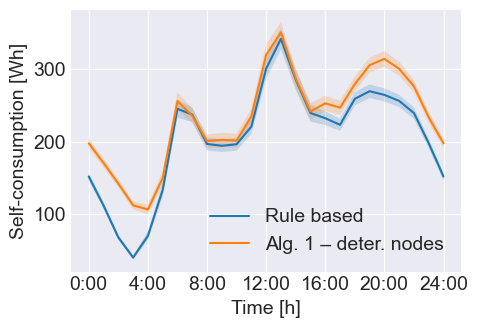

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    to_plot = val_info['self_consumption'][best_iter[alg], ...]
    to_plot = to_plot.reshape((-1, 24) + to_plot.shape[1:])
    to_plot = np.concatenate((to_plot, to_plot[:, 0, ...][:, np.newaxis, ...]), axis=1)
    # to_plot = to_plot.sum(axis=-1)
    means = to_plot.mean(axis=0)
    stds = np.std(to_plot, axis=0)
    ci = 1.96 * stds/np.sqrt(to_plot.shape[0])
    ax.plot(means, label=alg_names[alg])
    ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.2)

ticks = range(0, 25, 4)
plt.xticks(ticks=ticks, labels=[f"{h}:00" for h in ticks])
ax.set_xlabel('Time [h]')
ax.set_ylabel('Self-consumption [Wh]')
# plt.title('Self-consumption')
plt.legend()

plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/self_consumption.pdf')
plt.show()

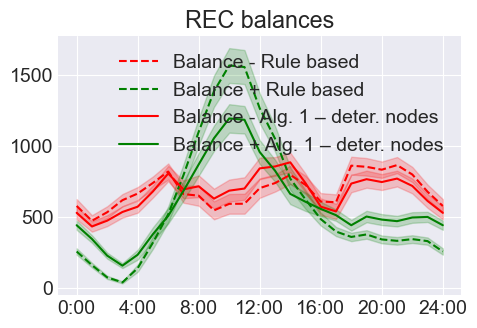

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

for alg, val_info in infos.items():
    balance_minus = val_info['balance_minus'][best_iter[alg], ...][:8760]
    balance_minus = balance_minus.reshape((-1, 24) + balance_minus.shape[1:])
    balance_minus = np.concatenate((balance_minus, balance_minus[:, 0, ...][:, np.newaxis, ...]), axis=1)
    balance_plus = val_info['balance_plus'][best_iter[alg], ...][:8760]
    balance_plus = balance_plus.reshape((-1, 24) + balance_plus.shape[1:])
    balance_plus = np.concatenate((balance_plus, balance_plus[:, 0, ...][:, np.newaxis, ...]), axis=1)

    means = balance_minus.mean(axis=0)
    stds = np.std(balance_minus, axis=0)
    ci = 1.96 * stds/np.sqrt(balance_minus.shape[0])
    ax.plot(means, linestyle=line_styles[alg], color='red', label=f'Balance - {alg_names[alg]}')
    ax.fill_between(range(len(means)), means + ci, means - ci, color='red', alpha=.2)

    means = balance_plus.mean(axis=0)
    stds = np.std(balance_plus, axis=0)
    ci = 1.96 * stds/np.sqrt(balance_plus.shape[0])
    ax.plot(means, linestyle=line_styles[alg], color='green', label=f'Balance + {alg_names[alg]}')
    ax.fill_between(range(len(means)), means + ci, means - ci, color='green', alpha=.2)

ticks = range(0, 25, 4)
plt.xticks(ticks=ticks, labels=[f"{h}:00" for h in ticks])
plt.title('REC balances')
plt.legend()
plt.show()

KeyError: 'no_glob'

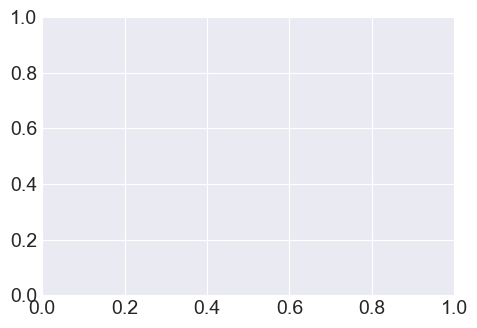

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

val_info_rec = infos['my_alg']
val_info_no_rec = infos['no_glob']

for i in range(n_agents):
    to_plot = val_info_rec['r_tot'][..., i] - val_info_no_rec['r_tot'][..., i]
    to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
    to_plot = to_plot.sum(axis=-1)
    means = to_plot.mean(axis=1)
    stds = np.std(to_plot, axis=1)
    ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
    ax.plot(means, linestyle='solid', color=colors[i])

    to_plot = val_info_rec['weig_reward']['r_trad'][..., i] + val_info_rec['weig_reward']['r_deg'][..., i] - (val_info_no_rec['weig_reward']['r_trad'][..., i] + val_info_no_rec['weig_reward']['r_deg'][..., i])
    to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
    to_plot = to_plot.sum(axis=-1)
    means = to_plot.mean(axis=1)
    stds = np.std(to_plot, axis=1)
    ci = 1.96 * stds/np.sqrt(to_plot.shape[1])
    ax.plot(means, linestyle='dashed', color=colors[i])

ax.set_xlabel('Validation step')
ax.set_ylabel(r'\Delta Reward [€]')
print(plt.rcParams['grid.color'])  # etc.

# plt.title('Total reward')
plt.legend(handles=legend_elements)
plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/differences_with_no_rec.pdf')
plt.show()

white


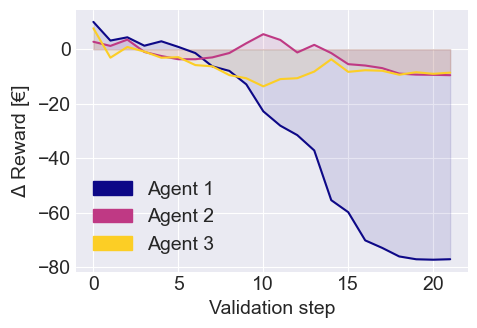

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

val_info_rec = infos['my_alg']
val_info_no_rec = infos['no_glob']

for i in range(n_agents):
    to_plot = val_info_rec['weig_reward']['r_trad'][..., i] + val_info_rec['weig_reward']['r_deg'][..., i] - (val_info_no_rec['weig_reward']['r_trad'][..., i] + val_info_no_rec['weig_reward']['r_deg'][..., i])
    to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
    to_plot = to_plot.sum(axis=-1)
    means = to_plot.mean(axis=1)
    stds = np.std(to_plot, axis=1)
    ax.plot(means, linestyle='solid', color=colors[i])
    ax.fill_between(range(len(means)), means, 0, color=colors[i], alpha=.1)

ax.set_xlabel('Validation step')
ax.set_ylabel(r'$\Delta$ Reward [€]')
print(plt.rcParams['grid.color'])  # etc.

# plt.title('Total reward')
plt.legend(handles=legend_elements)
plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/differences_with_no_rec_local.pdf')
plt.show()

white


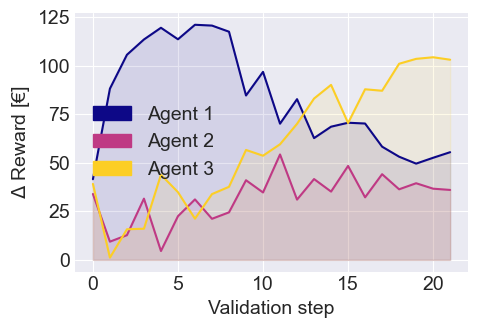

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

val_info_rec = infos['my_alg']
val_info_no_rec = infos['no_glob']

for i in range(n_agents):
    to_plot = val_info_rec['r_tot'][..., i] - val_info_no_rec['r_tot'][..., i]
    to_plot = to_plot.reshape(to_plot.shape[:1] + (-1, HOURS_PER_YEAR) + to_plot.shape[2:])
    to_plot = to_plot.sum(axis=-1)
    means = to_plot.mean(axis=1)
    stds = np.std(to_plot, axis=1)
    ax.plot(means, linestyle='solid', color=colors[i])
    ax.fill_between(range(len(means)), means, 0, color=colors[i], alpha=.1)

ax.set_xlabel('Validation step')
ax.set_ylabel(r'$\Delta$ Reward [€]')
print(plt.rcParams['grid.color'])  # etc.

# plt.title('Total reward')
plt.legend(handles=legend_elements)
plt.savefig('/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/trained_agents_for_paper/img/differences_with_no_rec_total.pdf')
plt.show()